## SMOTE-Sampling -  #700055807

In [1]:
#importing all modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_score,fbeta_score, accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [2]:
#importing white wine data set (UCI https://archive.ics.uci.edu/ml/datasets/wine+quality)

wine_df = pd.read_csv('data/winequality-white.csv', sep=';')

data = wine_df.copy()

In [3]:
#Creating the catigorical target, less than 8 as 0 and more than 8 as 1

data['type'] = np.where(data['quality'] < 8, 'bad', 'good')

In [4]:
# using the enconder to code 0,1 for bad and good respectvily 

le = LabelEncoder()
data['target'] = le.fit_transform(data['type'])

In [13]:
data['target'].value_counts(normalize=True) * 100

0    96.325031
1     3.674969
Name: target, dtype: float64

In [11]:
#installing imblearn for sampling methods
!pip install imblearn

     |████████████████████████████████| 167 kB 370 kB/s eta 0:00:01


## Splitting train data for SMOTE

In [6]:
#SMOTE sampling 
from imblearn.over_sampling import SMOTE

# Separate input features and target
y = data.iloc[:,-1]
X = data.iloc[:,:-3]

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

sm = SMOTE(random_state=27)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [9]:
# running the classifiers for the SMOTE sampling

model_scores = {}
model_roc_scores = {}
model_fbeta_score = {}
precision_scores = {}

DT_re_smote = DecisionTreeClassifier()
log_smote = LogisticRegression()
RF_smote = RandomForestClassifier()

for model in [DT_re_smote, log_smote, RF_smote]:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    model_scores[model] = score
    
    y_pred_proba = model.predict_proba(X_test)
    roc = roc_auc_score(y_test, y_pred_proba[:,1])
    model_roc_scores[model] = roc
    
    y_pred_proba = model.predict_proba(X_test)
    fb_score = fbeta_score(y_test, y_pred, beta=0.5)
    model_fbeta_score[model] = fb_score
    
    y_pred = model.predict(X_test)
    p_score = precision_score(y_test, y_pred)
    precision_scores[model] = p_score
    
    
model_scores
model_roc_scores
model_fbeta_score
precision_scores


#creating the df for comparing the classifiers

roc_df = pd.DataFrame(list(model_roc_scores.items()),columns = ['Model','Roc Auc Score']) 
scores_df = pd.DataFrame(list(model_scores.items()),columns = ['Model1','Accuracy Score'])
precision_scores_df = pd.DataFrame(list(precision_scores.items()), columns=['Model3','Precision Score'])
fbeta_scores_df = pd.DataFrame(list(model_fbeta_score.items()), columns=['Model2','F_beta Score'])

total_scores_df = pd.concat([roc_df,scores_df ,precision_scores_df, fbeta_scores_df], axis=1)
total_scores_df.drop(['Model1', 'Model2', 'Model3'], axis=1, inplace=True)
total_scores_df.index.name = 'TOMEK Sampling'
total_scores_df = total_scores_df.round(2)
total_scores_df.index = ['DecisionTreeClassifier', 'LogisticRegression', 'RandomForestClassifier']
total_scores_df

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Roc Auc Score,Accuracy Score,Precision Score,F_beta Score
DecisionTreeClassifier,DecisionTreeClassifier(),0.73,0.90,0.22,0.25
LogisticRegression,LogisticRegression(),0.75,0.71,0.09,0.10
RandomForestClassifier,"(DecisionTreeClassifier(max_features='auto', r...",0.89,0.95,0.37,0.38


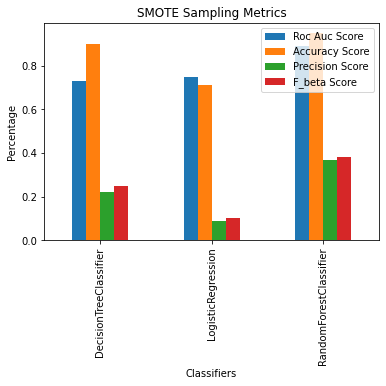

In [10]:
#plotting the comparison - SMOTE sampling

total_scores_df.plot(kind='bar')
plt.title('SMOTE Sampling Metrics')
plt.ylabel('Percentage')
plt.xlabel('Classifiers')
plt.show()

In [12]:
#Final table for comparison
total_scores_df.drop('Model', axis=1)

,Roc Auc Score,Accuracy Score,Precision Score,F_beta Score
DecisionTreeClassifier,0.73,0.90,0.22,0.25
LogisticRegression,0.75,0.71,0.09,0.10
RandomForestClassifier,0.89,0.95,0.37,0.38


## Running the classifiers for DT, RF, Log - SMOTE Sampling

In [19]:
log_smote = LogisticRegression(solver='liblinear')
log_smote.fit(X_train, y_train)
log_smote_pred = log_smote.predict(X_test)

In [20]:
accuracy_score(y_test,log_smote_pred)

0.7142857142857143

In [21]:
print(classification_report(y_test, log_smote_pred))

              precision    recall  f1-score   support

           0       0.98      0.72      0.83      1175
           1       0.09      0.64      0.15        50

    accuracy                           0.71      1225
   macro avg       0.53      0.68      0.49      1225
weighted avg       0.94      0.71      0.80      1225



No Skill: ROC AUC=0.500
Logistics SMOTE: ROC AUC=0.749


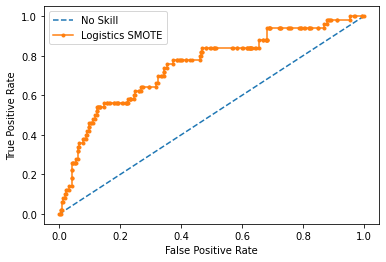

In [28]:
#AUC for logistic

ns_probs = [0 for _ in range(len(y_test))]
y_pred_log_smote_proba = log_smote.predict_proba(X_test)
log_smote_probs = y_pred_log_smote_proba[:,1]
ns_auc = roc_auc_score(y_test, ns_probs)
log_smote_auc = roc_auc_score(y_test, log_smote_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistics SMOTE: ROC AUC=%.3f' % (log_smote_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
logsomte_fpr, logsomte_tpr, _ = roc_curve(y_test, log_smote_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(logsomte_fpr, logsomte_tpr, marker='.', label='Logistics SMOTE')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [22]:
DT_re_smote = DecisionTreeClassifier()
DT_re_smote.fit(X_train, y_train)
y_pred_DT_smote = DT_re_smote.predict(X_test)

In [23]:
accuracy_score(y_test,y_pred_DT_smote)

0.9110204081632653

In [24]:
print(classification_report(y_test, y_pred_DT_smote))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95      1175
           1       0.24      0.56      0.34        50

    accuracy                           0.91      1225
   macro avg       0.61      0.74      0.65      1225
weighted avg       0.95      0.91      0.93      1225



No Skill: ROC AUC=0.500
DT SMOTE: ROC AUC=0.743


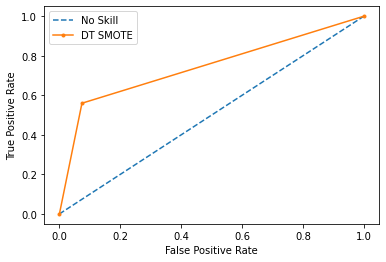

In [29]:
#AUC for DT


ns_probs = [0 for _ in range(len(y_test))]
y_pred_DT_re_smote_proba = DT_re_smote.predict_proba(X_test)
DT_smote_probs = y_pred_DT_re_smote_proba[:,1]
ns_auc = roc_auc_score(y_test, ns_probs)
DT_smote_auc = roc_auc_score(y_test, DT_smote_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('DT SMOTE: ROC AUC=%.3f' % (DT_smote_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
DTsomte_fpr, DTsomte_tpr, _ = roc_curve(y_test, DT_smote_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(DTsomte_fpr, DTsomte_tpr, marker='.', label='DT SMOTE')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [25]:
RF_smote = RandomForestClassifier()
RF_smote.fit(X_train, y_train)
y_pred_RF_smote = RF_smote.predict(X_test)
accuracy_score(y_test, y_pred_RF_smote)

0.9485714285714286

In [26]:
print(classification_report(y_test, y_pred_RF_smote))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1175
           1       0.39      0.46      0.42        50

    accuracy                           0.95      1225
   macro avg       0.68      0.71      0.70      1225
weighted avg       0.95      0.95      0.95      1225



No Skill: ROC AUC=0.500
RF SMOTE: ROC AUC=0.891


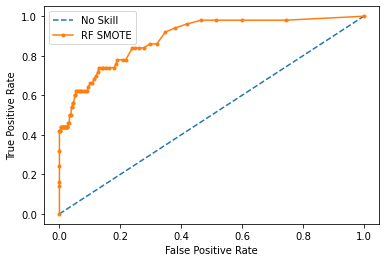

In [30]:
#AUC for RF

ns_probs = [0 for _ in range(len(y_test))]
y_pred_RF_smote_proba = RF_smote.predict_proba(X_test)
RF_smote_probs = y_pred_RF_smote_proba[:,1]
ns_auc = roc_auc_score(y_test, ns_probs)
RF_smote_auc = roc_auc_score(y_test, RF_smote_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('RF SMOTE: ROC AUC=%.3f' % (RF_smote_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
RFsomte_fpr, RFsomte_tpr, _ = roc_curve(y_test, RF_smote_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(RFsomte_fpr, RFsomte_tpr, marker='.', label='RF SMOTE')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

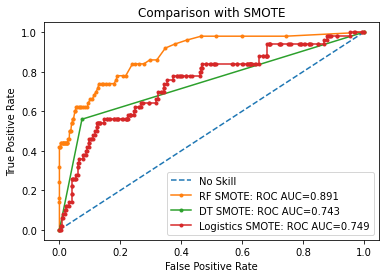

In [39]:
#AUC for all

ns_probs = [0 for _ in range(len(y_test))]
y_pred_RF_smote_proba = RF_smote.predict_proba(X_test)
RF_smote_probs = y_pred_RF_smote_proba[:,1]
ns_auc = roc_auc_score(y_test, ns_probs)
RF_smote_auc = roc_auc_score(y_test, RF_smote_probs)
#print('No Skill: ROC AUC=%.3f' % (ns_auc))
#print('RF SMOTE: ROC AUC=%.3f' % (RF_smote_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
RFsomte_fpr, RFsomte_tpr, _ = roc_curve(y_test, RF_smote_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(RFsomte_fpr, RFsomte_tpr, marker='.', label='RF SMOTE: ROC AUC=%.3f' % (RF_smote_auc))
plt.plot(DTsomte_fpr, DTsomte_tpr, marker='.', label='DT SMOTE: ROC AUC=%.3f' % (DT_smote_auc))
plt.plot(logsomte_fpr, logsomte_tpr, marker='.', label='Logistics SMOTE: ROC AUC=%.3f' % (log_smote_auc))
# axis labels

plt.title('Comparison with SMOTE')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()